In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [15]:
import pandas as pd
import numpy as np
from scipy.signal import medfilt
import glob, os

# Ruta donde están los .ts
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\als"

def cargar_filtrar_ts(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    df.columns = [
        "Elapsed_Time",
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Swing_%", "Right_Swing_%",
        "Left_Stance", "Right_Stance",
        "Left_Stance_%", "Right_Stance_%",
        "Double_Support", "Double_Support_%"
    ]
    df = df[df["Elapsed_Time"] > 20].reset_index(drop=True)
    for col in df.columns.drop("Elapsed_Time"):
        df[col] = medfilt(df[col], kernel_size=3)
    return df

def matriz_correlacion(df):
    cols = [
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Stance", "Right_Stance",
        "Double_Support"
    ]
    return df[cols].corr()

def procesar_grupo(folder_path):
    archivos = glob.glob(os.path.join(folder_path, "*.ts"))
    if len(archivos) == 0:
        raise FileNotFoundError(f"No se encontraron archivos .ts en {folder_path}")
    
    matrices = []
    for archivo in archivos:
        df = cargar_filtrar_ts(archivo)
        corr = matriz_correlacion(df)
        matrices.append(corr)
    
    mean_corr = sum(matrices) / len(matrices)
    return mean_corr

# ---- Ejecutar ----
mean_corr_als = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (ALS):")
print(mean_corr_als)


Matriz de correlación promedio (ALS):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.739462    0.438200     0.268328   
Right_Stride       0.739462      1.000000    0.257363     0.338546   
Left_Swing         0.438200      0.257363    1.000000     0.176888   
Right_Swing        0.268328      0.338546    0.176888     1.000000   
Left_Stance        0.861569      0.764673    0.162178     0.299005   
Right_Stance       0.709638      0.876115    0.263275     0.092592   
Double_Support     0.665802      0.581529    0.092471    -0.012612   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.861569      0.709638        0.665802  
Right_Stride       0.764673      0.876115        0.581529  
Left_Swing         0.162178      0.263275        0.092471  
Right_Swing        0.299005      0.092592       -0.012612  
Left_Stance        1.000000      0.732533        0.747091  
Right_Stance       0.732533      1.000000

In [3]:
import seaborn as sn

<Axes: >

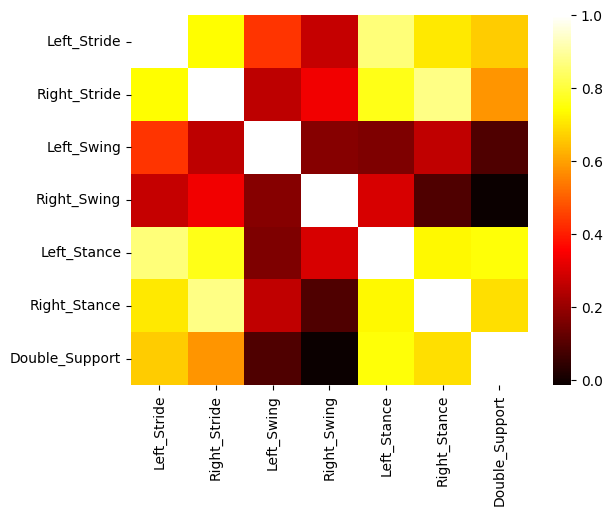

In [5]:
sn.heatmap(mean_corr_als,cmap='hot')

<Axes: >

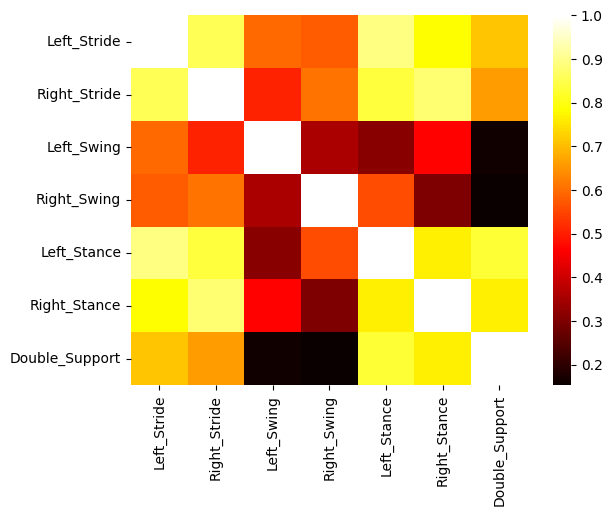

In [9]:
sn.heatmap(mean_corr_control,cmap='hot')

In [8]:

# Ruta donde están los .ts
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\control"

def cargar_filtrar_ts(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    df.columns = [
        "Elapsed_Time",
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Swing_%", "Right_Swing_%",
        "Left_Stance", "Right_Stance",
        "Left_Stance_%", "Right_Stance_%",
        "Double_Support", "Double_Support_%"
    ]
    df = df[df["Elapsed_Time"] > 20].reset_index(drop=True)
    for col in df.columns.drop("Elapsed_Time"):
        df[col] = medfilt(df[col], kernel_size=3)
    return df

def matriz_correlacion(df):
    cols = [
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Stance", "Right_Stance",
        "Double_Support"
    ]
    return df[cols].corr()

def procesar_grupo(folder_path):
    archivos = glob.glob(os.path.join(folder_path, "*.ts"))
    if len(archivos) == 0:
        raise FileNotFoundError(f"No se encontraron archivos .ts en {folder_path}")
    
    matrices = []
    for archivo in archivos:
        df = cargar_filtrar_ts(archivo)
        corr = matriz_correlacion(df)
        matrices.append(corr)
    
    mean_corr = sum(matrices) / len(matrices)
    return mean_corr

# ---- Ejecutar ----
mean_corr_control = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (control):")
print(mean_corr_control)


C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``s

Matriz de correlación promedio (control):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.855592    0.594524     0.579700   
Right_Stride       0.855592      1.000000    0.504198     0.607758   
Left_Swing         0.594524      0.504198    1.000000     0.357662   
Right_Swing        0.579700      0.607758    0.357662     1.000000   
Left_Stance        0.892827      0.836193    0.314516     0.560109   
Right_Stance       0.782789      0.880193    0.467217     0.302061   
Double_Support     0.710373      0.661886    0.161515     0.153537   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.892827      0.782789        0.710373  
Right_Stride       0.836193      0.880193        0.661886  
Left_Swing         0.314516      0.467217        0.161515  
Right_Swing        0.560109      0.302061        0.153537  
Left_Stance        1.000000      0.762617        0.829775  
Right_Stance       0.762617      1.00

C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``s

C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``s

Matriz de correlación promedio (control):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.671385    0.575449     0.409625   
Right_Stride       0.671385      1.000000    0.404611     0.463886   
Left_Swing         0.575449      0.404611    1.000000     0.200514   
Right_Swing        0.409625      0.463886    0.200514     1.000000   
Left_Stance        0.821538      0.657882    0.225297     0.425090   
Right_Stance       0.572987      0.803705    0.371300     0.107495   
Double_Support     0.537105      0.436332    0.088902    -0.103615   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.821538      0.572987        0.537105  
Right_Stride       0.657882      0.803705        0.436332  
Left_Swing         0.225297      0.371300        0.088902  
Right_Swing        0.425090      0.107495       -0.103615  
Left_Stance        1.000000      0.528938        0.681757  
Right_Stance       0.528938      1.00

<Axes: >

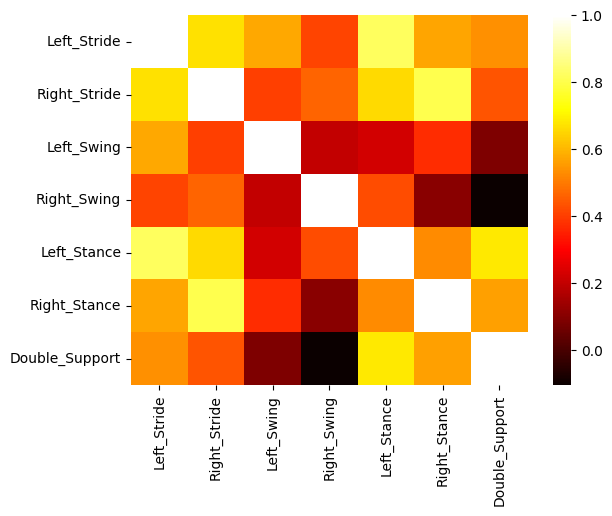

In [12]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\hunt"
mean_corr_hunt = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (control):")
print(mean_corr_hunt);
sn.heatmap(mean_corr_hunt,cmap='hot')

C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None)
C:\Users\mafig\AppData\Local\Temp\ipykernel_37664\2153134917.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``s

Matriz de correlación promedio (control):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.675566    0.526716     0.394333   
Right_Stride       0.675566      1.000000    0.423476     0.469131   
Left_Swing         0.526716      0.423476    1.000000     0.416311   
Right_Swing        0.394333      0.469131    0.416311     1.000000   
Left_Stance        0.822496      0.605328    0.141598     0.299192   
Right_Stance       0.596826      0.799494    0.284410     0.074311   
Double_Support     0.580280      0.365069   -0.053203    -0.147052   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.822496      0.596826        0.580280  
Right_Stride       0.605328      0.799494        0.365069  
Left_Swing         0.141598      0.284410       -0.053203  
Right_Swing        0.299192      0.074311       -0.147052  
Left_Stance        1.000000      0.572734        0.770121  
Right_Stance       0.572734      1.00

<Axes: >

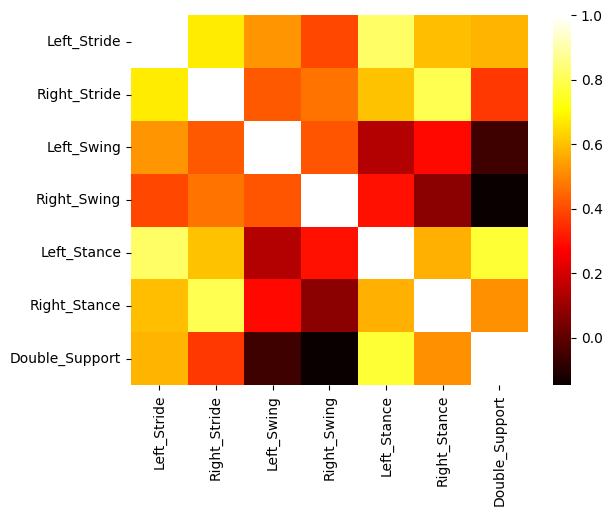

In [13]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\park"
mean_corr_park = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (control):")
print(mean_corr_park);
sn.heatmap(mean_corr_park,cmap='hot')